In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [42]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [43]:
X_test.shape

(10000, 32, 32, 3)

In [44]:
y_train.shape

(50000, 1)

In [45]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [46]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [47]:
y_test = y_test.reshape(-1,)

In [48]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [49]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])


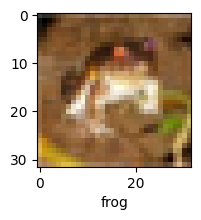

In [50]:
plot_sample(X_train,y_train,0)

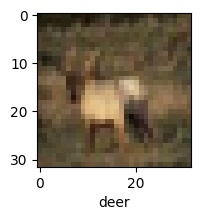

In [51]:
plot_sample(X_train,y_train,3)

In [52]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax")
])
ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 174s 111ms/step - loss: 1.8121 - accuracy: 0.3518
Epoch 2/5
1563/1563 [==============================] - 174s 111ms/step - loss: 1.6222 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 176s 113ms/step - loss: 1.5398 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 184s 117ms/step - loss: 1.4783 - accuracy: 0.4799
Epoch 5/5
1119/1563 [====================>.........] - ETA: 51s - loss: 1.4353 - accuracy: 0.4931

In [ ]:
ann.evaluate(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n",classification_report(y_test,y_pred_classes))

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4860 - accuracy: 0.4660
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1337 - accuracy: 0.6020
Epoch 3/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9963 - accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9116 - accuracy: 0.6834
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8540 - accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7974 - accuracy: 0.7227
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7483 - accuracy: 0.7407
Epoch 8/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.7083 - accuracy: 0.7524
Epoch 9/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6668 - accuracy: 0.7675
Epoch 10/10
1563/1563 [==============================] - 79s 50m

In [59]:

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9165 - accuracy: 0.6986


[0.9165012836456299, 0.6985999941825867]

In [60]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[8.89821036e-04, 5.10181941e-04, 8.53564218e-02, 6.43406272e-01,
        1.51863275e-02, 1.92459136e-01, 5.39874611e-03, 2.76287850e-02,
        2.88902577e-02, 2.74116173e-04],
       [5.52809611e-03, 8.92761499e-02, 4.30843130e-08, 1.71938169e-07,
        1.20891841e-07, 5.58485844e-08, 2.28171970e-07, 1.57968882e-09,
        9.04642880e-01, 5.52244426e-04],
       [8.52741450e-02, 6.29124761e-01, 5.78322960e-03, 1.51435900e-02,
        4.64230031e-03, 5.31646248e-04, 9.38241428e-04, 6.81847974e-04,
        2.49737456e-01, 8.14284571e-03],
       [8.10422778e-01, 1.43192930e-03, 3.13309161e-03, 5.60544664e-04,
        1.33676338e-03, 9.87902513e-06, 3.13079909e-05, 1.77157399e-05,
        1.82066321e-01, 9.89554566e-04],
       [3.62674155e-06, 1.60916199e-04, 8.87990557e-03, 4.44575138e-02,
        5.40870965e-01, 4.35530581e-03, 4.00803566e-01, 5.93211880e-05,
        9.10567469e-05, 3.17841099e-04]], dtype=float32)

In [61]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [62]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

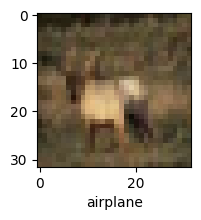

In [63]:
plot_sample(X_test, y_test,3)

In [64]:
classes[y_classes[3]]

'airplane'

In [65]:
classes[y_classes[3]]

'airplane'